In [115]:
# Imporint necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [116]:
# Load dataset
data = pd.read_csv('bank_data.csv')

# 1. Data Exploration

In [117]:
# Check number of rows and columns
data.shape

(45211, 32)

In [118]:
data.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y
0,58,0,2143,1,0,261,1,-1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,44,0,29,1,0,151,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,76,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,47,0,1506,1,0,92,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,1,0,0,198,1,-1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [119]:
data.tail()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y
45206,51,0,825,0,0,977,3,-1,0,0,...,0,0,0,0,0,0,1,0,0,1
45207,71,0,1729,0,0,456,2,-1,0,0,...,0,0,1,0,0,0,0,0,0,1
45208,72,0,5715,0,0,1127,5,184,3,0,...,0,0,1,0,0,0,0,0,0,1
45209,57,0,668,0,0,508,4,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
45210,37,0,2971,0,0,361,2,188,11,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
#Check data type and all are int
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              45211 non-null  int64
 1   default          45211 non-null  int64
 2   balance          45211 non-null  int64
 3   housing          45211 non-null  int64
 4   loan             45211 non-null  int64
 5   duration         45211 non-null  int64
 6   campaign         45211 non-null  int64
 7   pdays            45211 non-null  int64
 8   previous         45211 non-null  int64
 9   poutfailure      45211 non-null  int64
 10  poutother        45211 non-null  int64
 11  poutsuccess      45211 non-null  int64
 12  poutunknown      45211 non-null  int64
 13  con_cellular     45211 non-null  int64
 14  con_telephone    45211 non-null  int64
 15  con_unknown      45211 non-null  int64
 16  divorced         45211 non-null  int64
 17  married          45211 non-null  int64
 18  single

In [121]:
#summary statistics
data.describe()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.00000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,258.163080,2.763841,40.197828,0.580323,0.108403,...,0.027427,0.209197,0.050076,0.034925,0.09188,0.020747,0.168034,0.028820,0.006370,0.116985
std,10.618762,0.133049,3044.765829,0.496878,0.366820,257.527812,3.098021,100.128746,2.303441,0.310892,...,0.163326,0.406740,0.218105,0.183592,0.28886,0.142538,0.373901,0.167303,0.079559,0.321406
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [122]:
#pairplot to visualize relationship between variables
sns.pairplot(data)
plt.show()

C:\Users\Rajesh Pabbati\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


In [123]:
#correlation matrix
data.corr()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y
age,1.000000,-0.017879,0.097783,-0.185513,-0.015655,-0.004648,0.004760,-0.023758,0.001288,-0.004927,...,0.086650,-0.023571,0.447378,-0.008093,-0.065780,-0.197302,-0.068632,0.000412,0.050200,0.025155
default,-0.017879,1.000000,-0.066745,-0.006025,0.077234,-0.010021,0.016822,-0.029979,-0.018329,-0.026389,...,-0.000359,-0.002655,-0.011290,0.004107,0.000068,-0.016222,-0.003089,0.006470,-0.006669,-0.022419
balance,0.097783,-0.066745,1.000000,-0.068768,-0.084350,0.021560,-0.014578,0.003435,0.016674,0.011857,...,0.001661,0.067797,0.046900,0.017850,-0.038151,0.001233,-0.016183,0.009023,0.010784,0.052838
housing,-0.185513,-0.006025,-0.068768,1.000000,0.041323,0.005075,-0.023599,0.124178,0.037076,0.106795,...,-0.079380,-0.063382,-0.156633,-0.027319,0.070435,-0.085066,-0.012823,-0.048229,-0.075023,-0.139173
loan,-0.015655,0.077234,-0.084350,0.041323,1.000000,-0.012412,0.009980,-0.022754,-0.011043,-0.002186,...,-0.017234,-0.038904,-0.014861,-0.007882,0.035575,-0.058503,0.014798,-0.035961,-0.031943,-0.068185
duration,-0.004648,-0.010021,0.021560,0.005075,-0.012412,1.000000,-0.084570,-0.001565,0.001203,-0.018925,...,-0.008046,-0.008323,0.026032,0.007383,0.001427,-0.006504,-0.009176,0.020322,-0.006390,0.394521
campaign,0.004760,0.016822,-0.014578,-0.023599,0.009980,-0.084570,1.000000,-0.088628,-0.032855,-0.088131,...,0.003097,0.016686,-0.030913,0.005479,-0.004671,-0.021813,0.020739,-0.018448,0.014091,-0.073172
pdays,-0.023758,-0.029979,0.003435,0.124178,-0.022754,-0.001565,-0.088628,1.000000,0.454820,0.701052,...,-0.031350,-0.007871,-0.006315,-0.010356,0.005710,0.024486,-0.013478,-0.010411,-0.015366,0.103621
previous,0.001288,-0.018329,0.016674,0.037076,-0.011043,0.001203,-0.032855,0.454820,1.000000,0.350627,...,-0.015204,0.019579,0.005818,-0.002371,-0.010926,0.023556,-0.001123,-0.008504,-0.009068,0.093236
poutfailure,-0.004927,-0.026389,0.011857,0.106795,-0.002186,-0.018925,-0.088131,0.701052,0.350627,1.000000,...,-0.016300,0.003276,-0.005031,-0.002390,-0.001553,0.007646,-0.005049,-0.012438,-0.010034,0.009885


# 2. Data Preprocessing

In [124]:
#Checking missing values and no missing values found
data.isnull().sum()

age                0
default            0
balance            0
housing            0
loan               0
duration           0
campaign           0
pdays              0
previous           0
poutfailure        0
poutother          0
poutsuccess        0
poutunknown        0
con_cellular       0
con_telephone      0
con_unknown        0
divorced           0
married            0
single             0
joadmin.           0
joblue.collar      0
joentrepreneur     0
johousemaid        0
jomanagement       0
joretired          0
joself.employed    0
joservices         0
jostudent          0
jotechnician       0
jounemployed       0
jounknown          0
y                  0
dtype: int64

# 3. Model Building

In [125]:
#Creating feature variales and target variables
X = data.drop('y', axis=1)
y = data['y']

In [126]:
# Splitting training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
#Creating instance of LogisticRegression
model = LogisticRegression()

In [128]:
from sklearn.preprocessing import StandardScaler

In [129]:
#Standardizing train and test features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [130]:
#Training the model
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [131]:
#Prediciting the model with scaled test data
y_pred = model.predict(X_test_scaled)

# 4. Model Evaluation

In [132]:
#Evaluating the model with performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [133]:
#Printing the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)

Accuracy: 0.8976003538648678
Precision: 0.6508226691042047
Recall: 0.32630614115490375
F1 Score: 0.43467643467643463
ROC-AUC Score: 0.6511435132333875


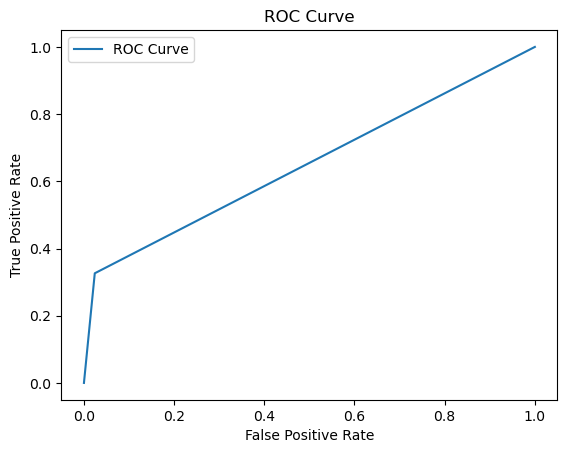

In [134]:
#Visualizing the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()